# Step 1
L'idea è quella di utilizzare l'informazione nota della massa della $Z^0$ per poter riuscire ad aumentare l'efficienza di muoni selezionati, in particolare il nostro obiettivo è quello di abbattere il fondo e il noise. Di seguito mostro quell che dovrebbe essere l'idea generale, sperando di non fotttere tutto
* Grafico la massa ricostruita utilizzando due $\mu$ che siano OS, qualsiasi segnale chiamo in questa descrizione come rumore intendo gli SS in tutto il range
* Ricerco vari tagli da poter effettuare così da selezionare solo determinati muoni
    + Utilizzo dunque un metodo del tipo _tag and probe_ 
        - Studiando i file DYJets e TTDilep Cerco di capire i migliori range dove effettuare dei tagli
        - Seleziono per ogni evento i muoni "tag" e poi con criteri meno stringenti cerco un probe
        - Il solo utilizzare questo metodo dovrebbe garantire un certo abbattimento del noise, dato che non sto pigliando tutti i muoni a caso senza senso
* Rifaccio il grafico della massa, studiandomi in particolare le OS (che già so essere un segnale)  dopo che ho effettuato tutti i tagli che ho nuovamente ritrovato, sperando che ciò vadad bene

In [1]:
import ROOT
import particle as pt

Welcome to JupyROOT 6.26/04


In [2]:
fileDY = ROOT.TFile("./datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

fileTT = ROOT.TFile("./datas/TTDilep.root","OPEN")
tttr = fileTT.trees.events

file = ROOT.TFile("./datas/Data.root","OPEN")
tr = file.trees.events

## DYJets

Warning in <TFile::Append>: Replacing existing TH1: DY_mu_mass (Potential memory leak).


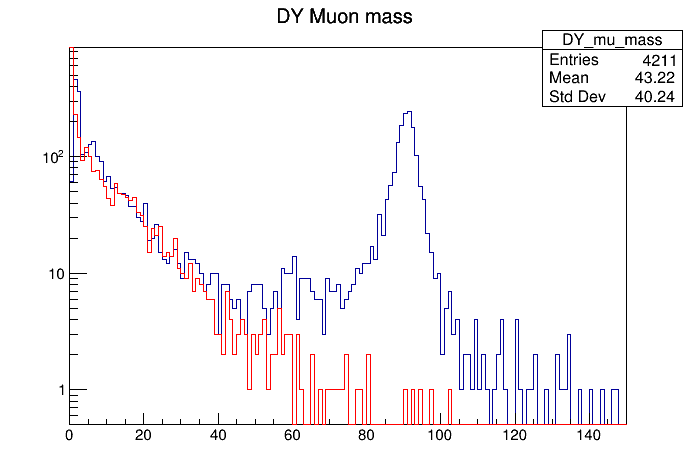

In [3]:
are_os = lambda x,y: x.charge*y.charge<0
h_mu_mass_os = ROOT.TH1F("DY_mu_mass","DY Muon mass",150,0,150) 
h_mu_mass_ss = ROOT.TH1F("DY_mu_mass","DY Muon mass",150,0,150)

c=ROOT.TCanvas()

for i in range(dytr.GetEntries()):
    dytr.GetEntry(i)
    muons=pt.get_collection(dytr,"muontracks")
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                h_mu_mass_os.Fill((muons[mi].p4+muons[mj].p4).M())
            else:
                h_mu_mass_ss.Fill((muons[mi].p4+muons[mj].p4).M())
c.Draw()
c.SetLogy()
h_mu_mass_os.Draw()
h_mu_mass_ss.SetLineColor(ROOT.kRed)
h_mu_mass_ss.Draw("same")

Selecting only OS muons in the mass range


(<cppyy.gbl.TCanvas object at 0x634f340>,
 <cppyy.gbl.TH1F object at 0x92e99c0>)

Warning in <TFile::Append>: Replacing existing TH1: muontracks_chi2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: muontracks_chi2 (Potential memory leak).


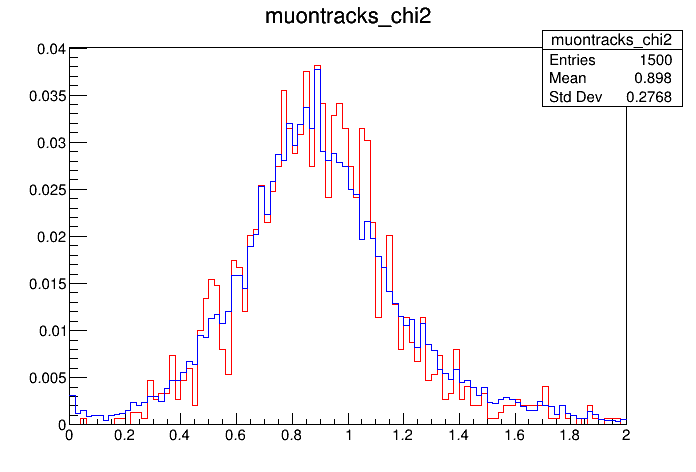

In [8]:
pt.mass_z_range(fileDY, dytr, "muontracks_chi2", 100, 0, 2,1)

Selecting only OS muons in the mass range


(<cppyy.gbl.TCanvas object at 0x279d440>,
 <cppyy.gbl.TH1F object at 0x9307af0>)

Warning in <TFile::Append>: Replacing existing TH1: muontracks_dz (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: muontracks_dz (Potential memory leak).


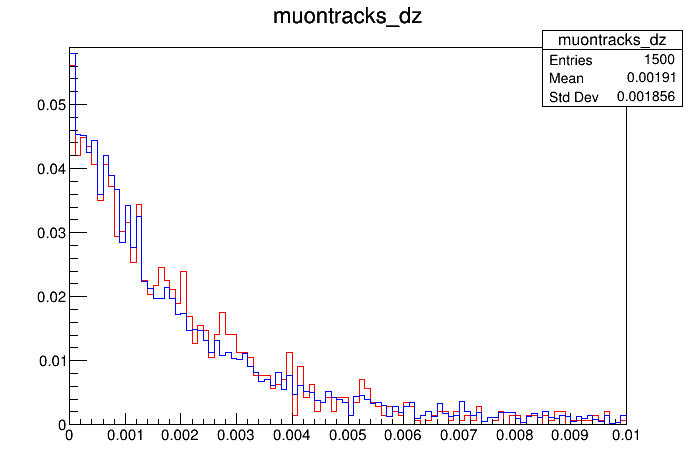

In [10]:
pt.mass_z_range(fileDY, dytr, "muontracks_dz", 100, 0, 0.01,1)

Selecting only OS muons in the mass range


(<cppyy.gbl.TCanvas object at 0x92eaa00>,
 <cppyy.gbl.TH1F object at 0x7fa4e20>)

Warning in <TFile::Append>: Replacing existing TH1: muontracks_dB (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: muontracks_dB (Potential memory leak).


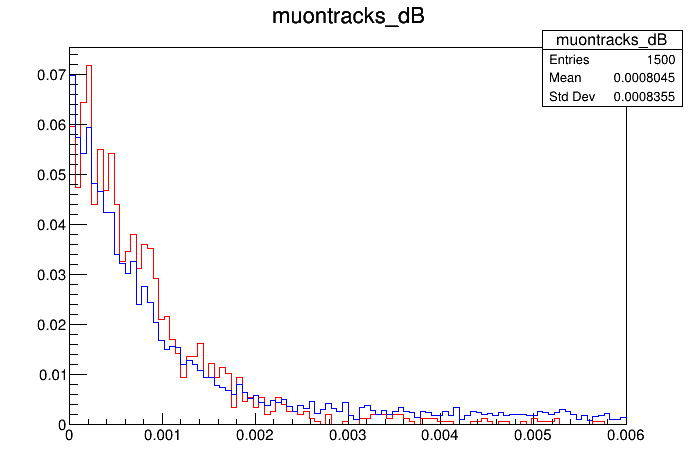

In [11]:
pt.mass_z_range(fileDY, dytr, "muontracks_dB", 100, 0, 0.006,1)

Selecting only OS muons in the mass range


(<cppyy.gbl.TCanvas object at 0x7f9a570>,
 <cppyy.gbl.TH1F object at 0x8c4f320>)

Warning in <TFile::Append>: Replacing existing TH1: muontracks_isoDeposits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: muontracks_isoDeposits (Potential memory leak).


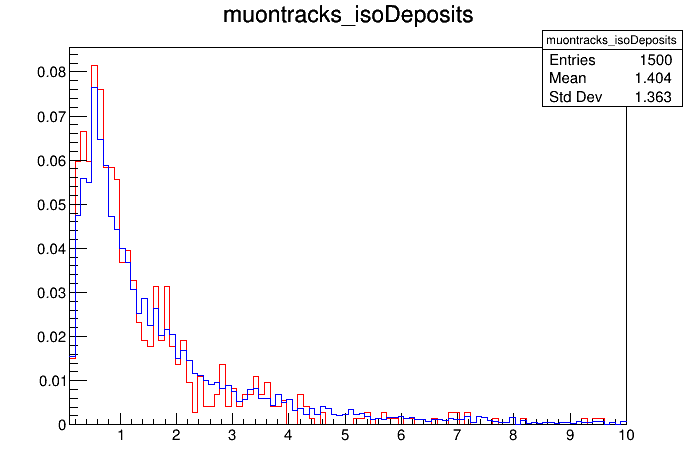

In [12]:
pt.mass_z_range(fileDY, dytr, "muontracks_isoDeposits", 100, 0.1, 10,1)

Procedo col cutting dove farò i seguenti tagli:
* $dB<0,001$
* $isoDeposits <1.5$
    + Su internet ho letto che si consigliava $<0.15$, boh poi provo
* Forse $p_{t,tag}>24$

Finding tag muons

In [ ]:
for i in range(dytr.GetEntries()):
    dytr.GetEntry(i)
    muons = pr.get_collection(dytr, "muontracks")
    for mi in range(len(muons)):
        for mj in range(mi+1): #devo mettere che arrivi ad essere uguale a mi e non minore
            if(dytr.muontracks_chi2<1.2 and dytr.muontracks_chi2>0.6):
                if(dytr.muontracks_dz<0.003):
                    if(dytr.muontracks_dB<0.0015):
                        if(dytr.muontracks_isoDeposits<2):
                            p4t=muons[mj].p4
            elif(dytr.muontracks_chi2<1.8 and dytr.muontracks_chi2>0.2):
                        
                            